# Failure Factor Analysis

This notebook analyzes failure factors extracted from JICA ODA evaluation reports.

## 1. Data Loading and Overview

In [1]:
%pip install japanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import japanize_matplotlib
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# Load the data
csv_path = "out_csv/df_fail_factor.csv"
df = pd.read_csv(csv_path)

# Display basic information
print(f"Total number of records: {len(df)}")
print(f"Number of unique projects: {df['file'].nunique()}")
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")

Total number of records: 3526
Number of unique projects: 527

Dataset shape: (3526, 14)

Column names:
['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'title', 'fail_factor', 'impact', 'phase', 'actor', 'controllability', 'is_overrun_related', 'evidence', 'evidence_section', 'confidence', 'file']


In [4]:
# Display first few rows
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,fail_factor,impact,phase,actor,controllability,is_overrun_related,evidence,evidence_section,confidence,file
0,0,0.0,0.0,北部州地下水開発計画,鉄鋼価格およびザンビア・クワチャの対米ドルレートの上昇,掘削された深井戸の数量が、計画されていた175本に対し実績は163本にとどまった,IMPLEMENTATION,EXOGENOUS,LOW,False,アウトプットである深井戸の数量は、鉄鋼価格およびザンビア・クワチャの対米ドルレートの上昇のた...,2 効率性,1.00,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
1,1,1.0,1.0,北部州地下水開発計画,住民の関与不足による、維持管理費（徴収率12～52％）の徴収不足,施設の運営・維持管理にかかる財務面に問題が生じ、事業の持続性に影響を及ぼしている,OPERATION,PARTNER,MEDIUM,False,住民からの維持管理費の徴収率が比較的低いため、財務の一部に問題が見られたほか、故障したハンド...,Ⅱ 評価結果,0.90,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
2,2,2.0,2.0,北部州地下水開発計画,一部の村落レベル維持管理組織（V-WASHE）の不活性化,故障したハンドポンプの放置や、維持管理状況に関する最新情報の入手困難を招いている,OPERATION,PARTNER,MEDIUM,False,2010 年 1 月時点で故障したハンドポンプや活動していない村落レベル維持管理組織があり、...,4 持続性,0.90,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
3,3,3.0,3.0,北部州地下水開発計画,給水状況に関するモニタリング・情報管理システムの未整備,事後評価時点において安全な水の供給量データが入手できず、事業効果の検証が困難となった,OPERATION,PARTNER,HIGH,False,事後評価時点の安全な水の供給量はデータが入手できず確認できなかったため、効果発現に一部問題が...,Ⅱ 評価結果,0.80,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
4,4,4.0,4.0,北部州地下水開発計画,地下水における高い鉄分含有量の発生（自然要因および掘削孔の浸食等）,住民の井戸水利用に悪影響を及ぼし、事業によって得られる効果の最大化を阻害している,OPERATION,EXOGENOUS,LOW,False,北部州の地下水は鉄含有量が多いため、住民の井戸水利用に影響している。...事業効果の最大化を...,3 有効性･インパクト,0.90,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
5,5,5.0,0.0,ベイラ港浚渫能力増強計画,実現可能性の低い24時間3チーム体制を前提とした浚渫作業計画,供与された2隻の浚渫船のみでは目標水深8mを達成できず、他ドナー支援による追加浚渫が必要となった,PLANNING,MULTIPLE,HIGH,False,旧航路を浚渫して水深 8m とする本事業の目的に対しては、日本政府の無償資金協力により建造さ...,0. 要旨,0.90,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
6,6,6.0,1.0,ベイラ港浚渫能力増強計画,実施機関の全国的な浚渫責務を考慮せず、ベイラ港のみでの稼働を前提とした機材投入計画,先行供与船が他港の作業に割かれたことで2隻集中的な作業体制が遅延し、目標増深の達成率が約52...,PLANNING,MULTIPLE,MEDIUM,True,アルアングア号と本事業で供与した新浚渫船...は、ベイラ港航路のみで浚渫作業を行う想定で計画...,3.1.4 事業目的達成に向けた計画の適切性,0.85,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
7,7,7.0,2.0,ベイラ港浚渫能力増強計画,基本設計調査時における運営維持管理予算の過小評価と資金源の確認不足,急増する運営費に対し具体的な資金源の目途が立たず、実施機関の慢性的な赤字が持続性の課題となった,PLANNING,JICA,HIGH,False,運営維持管理予算は...400 万～500 万米ドルと見積もられていた。モザンビーク側が急増...,3.1.4 事業目的達成に向けた計画の適切性,0.90,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
8,8,8.0,3.0,ベイラ港浚渫能力増強計画,24時間交代制勤務への移行に必要な増員船員の育成期間や体制整備への配慮不足,事後評価時点まで24時間体制は一度も実施されず、標準年間稼働時間に対する稼働率が60～70%...,PLANNING,JICA,HIGH,False,増員する船員の育成期間を考えると 24 時間 2 交代 3 チーム体制を直ちに実施できるよう...,3.1.4 事業目的達成に向けた計画の適切性,0.85,https://www2.jica.go.jp/ja/evaluation/pdf/2010...
9,9,9.0,4.0,ベイラ港浚渫能力増強計画,船舶管理手法や測量技術、中長期的な業務計画策定能力といったソフト面の指導不足,自力での技術改善が評価時点でなされておらず、別途日本政府の見返り資金による追加技術指導が必要...,OPERATION,PARTNER,MEDIUM,False,船舶管理手法、浚渫機器の取り扱いや保守技術、測量技術を含む操縦に関する技術習得の向上が必要と...,3.5.2 運営・維持管理の技術,0.80,https://www2.jica.go.jp/ja/evaluation/pdf/2010...


In [5]:
# Data types and missing values
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nMissing Values (%):")
print((df.isnull().sum() / len(df) * 100).round(2))

Data Types:
Unnamed: 0.2            int64
Unnamed: 0.1          float64
Unnamed: 0            float64
title                  object
fail_factor            object
impact                 object
phase                  object
actor                  object
controllability        object
is_overrun_related     object
evidence               object
evidence_section       object
confidence            float64
file                   object
dtype: object


Missing Values:
Unnamed: 0.2             0
Unnamed: 0.1            15
Unnamed: 0            3464
title                    0
fail_factor              7
impact                   0
phase                    2
actor                    1
controllability          1
is_overrun_related       1
evidence                 0
evidence_section         0
confidence               0
file                     0
dtype: int64


Missing Values (%):
Unnamed: 0.2           0.00
Unnamed: 0.1           0.43
Unnamed: 0            98.24
title                  0.00
fail_factor

## 2. Categorical Variable Analysis

In [6]:
# Basic statistics for confidence scores
print("Confidence Score Statistics:")
print(df['confidence'].describe())
print(f"\nRecords with confidence >= 0.8: {(df['confidence'] >= 0.8).sum()} ({(df['confidence'] >= 0.8).sum()/len(df)*100:.1f}%)")
print(f"Records with confidence >= 0.7: {(df['confidence'] >= 0.7).sum()} ({(df['confidence'] >= 0.7).sum()/len(df)*100:.1f}%)")
print(f"Records with confidence < 0.6: {(df['confidence'] < 0.6).sum()} ({(df['confidence'] < 0.6).sum()/len(df)*100:.1f}%)")

Confidence Score Statistics:
count    3526.000000
mean        0.909453
std         0.061087
min         0.700000
25%         0.900000
50%         0.900000
75%         0.950000
max         1.000000
Name: confidence, dtype: float64

Records with confidence >= 0.8: 3509 (99.5%)
Records with confidence >= 0.7: 3526 (100.0%)
Records with confidence < 0.6: 0 (0.0%)


In [7]:
# Distribution by Phase
print("Distribution by Phase:")
phase_counts = df['phase'].value_counts()
print(phase_counts)
print("\nPercentages:")
print((phase_counts / len(df) * 100).round(2))

Distribution by Phase:
phase
OPERATION         1860
IMPLEMENTATION    1052
PLANNING           611
PLANING              1
Name: count, dtype: int64

Percentages:
phase
OPERATION         52.75
IMPLEMENTATION    29.84
PLANNING          17.33
PLANING            0.03
Name: count, dtype: float64


In [8]:
# Distribution by Actor
print("Distribution by Actor:")
actor_counts = df['actor'].value_counts()
print(actor_counts)
print("\nPercentages:")
print((actor_counts / len(df) * 100).round(2))

Distribution by Actor:
actor
PARTNER      1990
MULTIPLE      540
EXOGENOUS     498
JICA          381
VENDOR        116
Name: count, dtype: int64

Percentages:
actor
PARTNER      56.44
MULTIPLE     15.31
EXOGENOUS    14.12
JICA         10.81
VENDOR        3.29
Name: count, dtype: float64


In [9]:
# Distribution by Controllability
print("Distribution by Controllability:")
control_counts = df['controllability'].value_counts()
print(control_counts)
print("\nPercentages:")
print((control_counts / len(df) * 100).round(2))

Distribution by Controllability:
controllability
MEDIUM    1588
LOW       1195
HIGH       742
Name: count, dtype: int64

Percentages:
controllability
MEDIUM    45.04
LOW       33.89
HIGH      21.04
Name: count, dtype: float64


In [10]:
# Distribution of is_overrun_related
print("Distribution of Overrun-Related Factors:")
overrun_counts = df['is_overrun_related'].value_counts()
print(overrun_counts)
print("\nPercentages:")
print((overrun_counts / len(df) * 100).round(2))

Distribution of Overrun-Related Factors:
is_overrun_related
False    2718
True      807
Name: count, dtype: int64

Percentages:
is_overrun_related
False    77.08
True     22.89
Name: count, dtype: float64


## 3. Visualizations

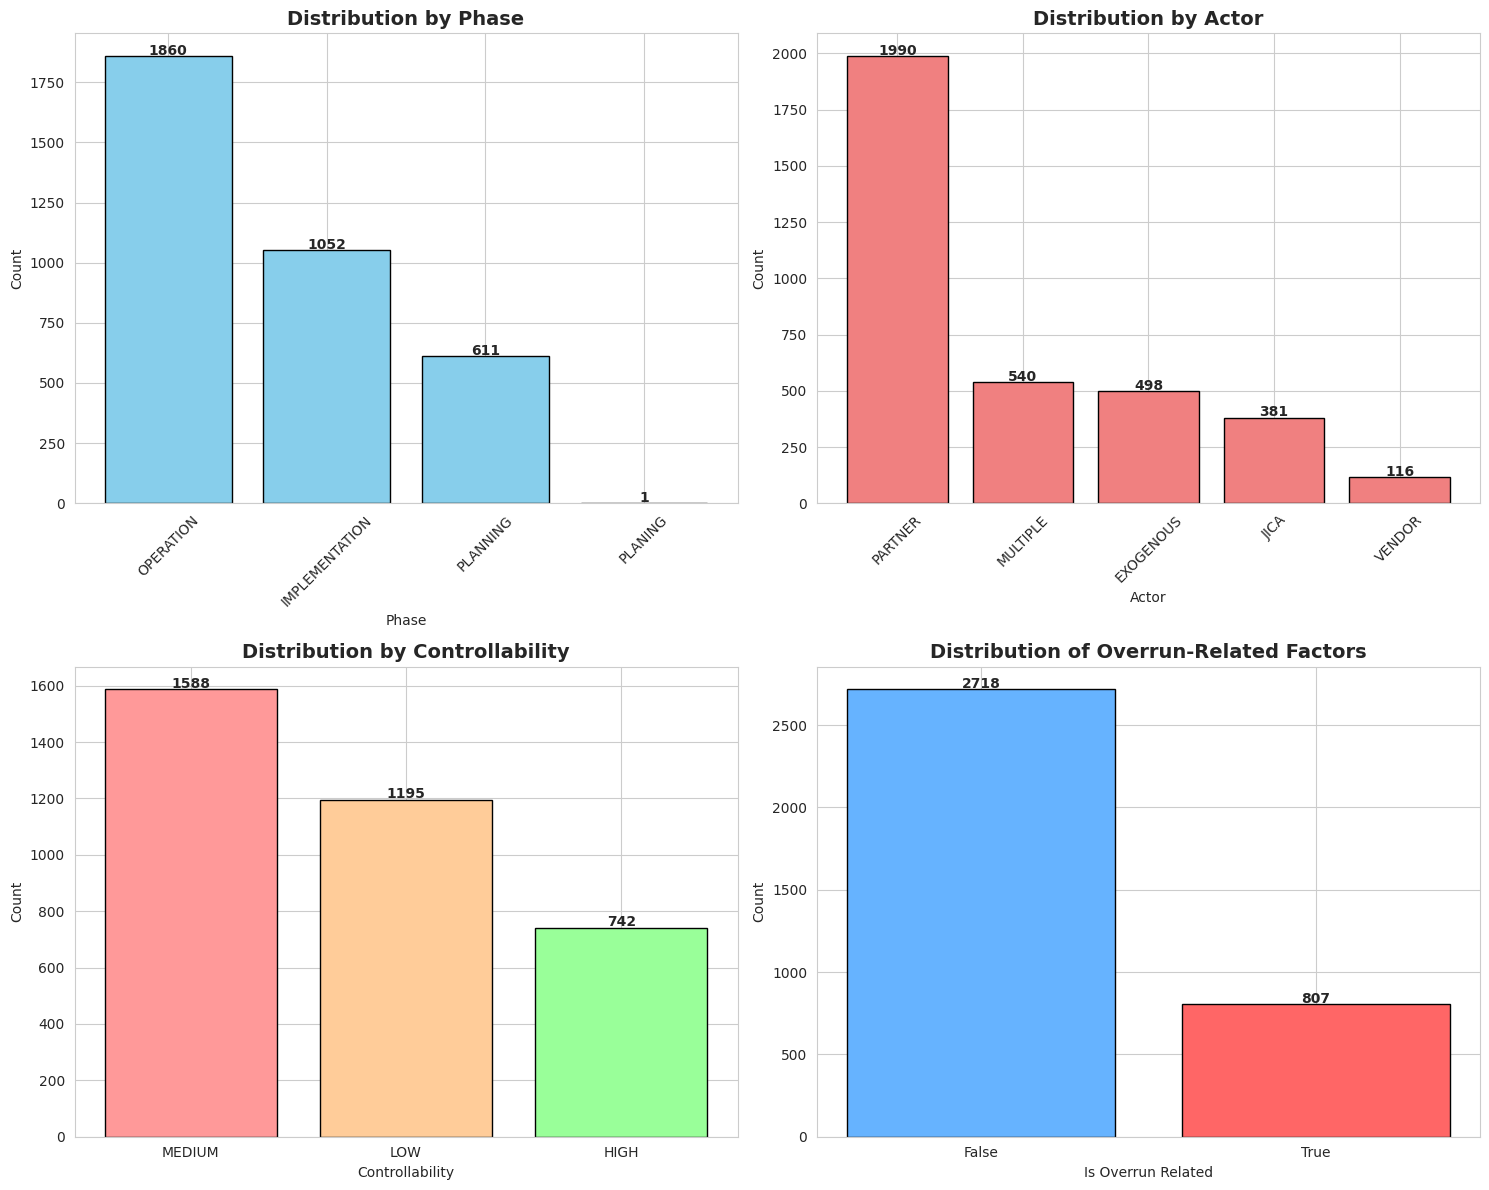

In [11]:
# Create subplots for categorical distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Phase distribution
phase_counts = df['phase'].value_counts()
axes[0, 0].bar(phase_counts.index, phase_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution by Phase', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Phase')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(phase_counts.values):
    axes[0, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Actor distribution
actor_counts = df['actor'].value_counts()
axes[0, 1].bar(actor_counts.index, actor_counts.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution by Actor', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Actor')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(actor_counts.values):
    axes[0, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Controllability distribution
control_counts = df['controllability'].value_counts()
colors_control = ['#ff9999', '#ffcc99', '#99ff99']
axes[1, 0].bar(control_counts.index, control_counts.values, color=colors_control, edgecolor='black')
axes[1, 0].set_title('Distribution by Controllability', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Controllability')
axes[1, 0].set_ylabel('Count')
for i, v in enumerate(control_counts.values):
    axes[1, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Overrun-related distribution
overrun_counts = df['is_overrun_related'].value_counts()
colors_overrun = ['#66b3ff', '#ff6666']
axes[1, 1].bar([str(x) for x in overrun_counts.index], overrun_counts.values, color=colors_overrun, edgecolor='black')
axes[1, 1].set_title('Distribution of Overrun-Related Factors', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Is Overrun Related')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(overrun_counts.values):
    axes[1, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

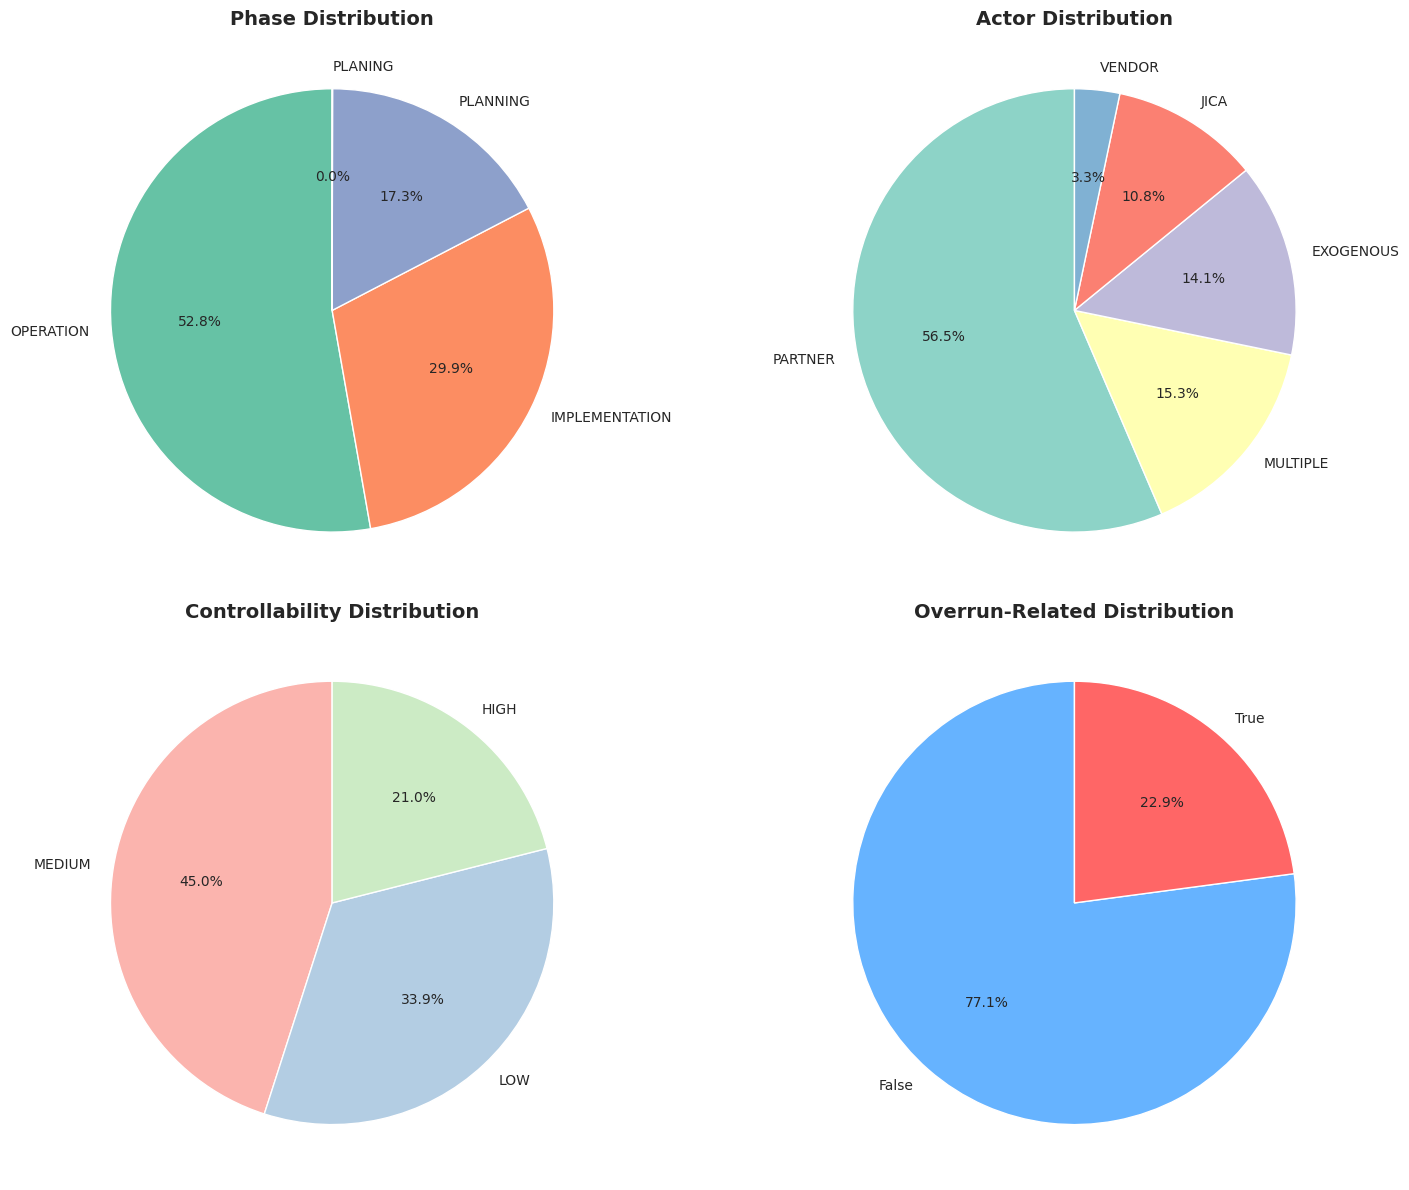

In [12]:
# Pie charts for better proportion visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Phase pie chart
phase_counts = df['phase'].value_counts()
axes[0, 0].pie(phase_counts.values, labels=phase_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette('Set2'))
axes[0, 0].set_title('Phase Distribution', fontsize=14, fontweight='bold')

# Actor pie chart
actor_counts = df['actor'].value_counts()
axes[0, 1].pie(actor_counts.values, labels=actor_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette('Set3'))
axes[0, 1].set_title('Actor Distribution', fontsize=14, fontweight='bold')

# Controllability pie chart
control_counts = df['controllability'].value_counts()
axes[1, 0].pie(control_counts.values, labels=control_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette('Pastel1'))
axes[1, 0].set_title('Controllability Distribution', fontsize=14, fontweight='bold')

# Overrun-related pie chart
overrun_counts = df['is_overrun_related'].value_counts()
axes[1, 1].pie(overrun_counts.values, labels=[str(x) for x in overrun_counts.index], autopct='%1.1f%%', 
               startangle=90, colors=['#66b3ff', '#ff6666'])
axes[1, 1].set_title('Overrun-Related Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

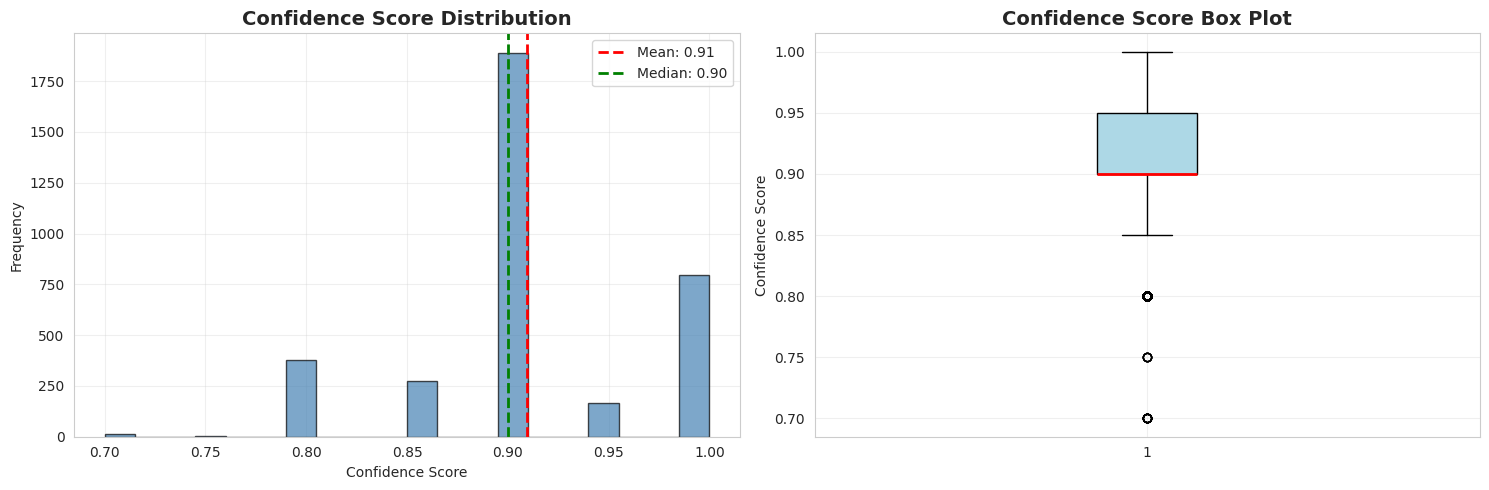

In [13]:
# Confidence score distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['confidence'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['confidence'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["confidence"].mean():.2f}')
axes[0].axvline(df['confidence'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["confidence"].median():.2f}')
axes[0].set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Confidence Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['confidence'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', edgecolor='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axes[1].set_title('Confidence Score Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Confidence Score')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Cross-tabulation Analysis

Phase vs Actor Cross-tabulation:
actor           EXOGENOUS  JICA  MULTIPLE  PARTNER  VENDOR   All
phase                                                           
IMPLEMENTATION        216    98       245      407      86  1052
OPERATION             265    15        79     1483      18  1860
PLANING                 0     1         0        0       0     1
PLANNING               17   266       216      100      12   611
All                   498   380       540     1990     116  3524




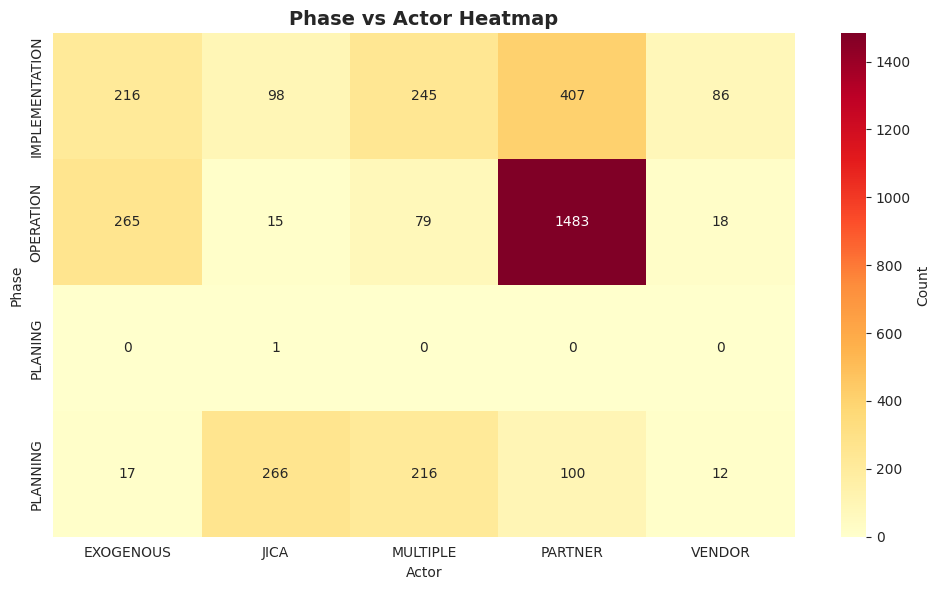

In [14]:
# Phase vs Actor cross-tabulation
print("Phase vs Actor Cross-tabulation:")
phase_actor_ct = pd.crosstab(df['phase'], df['actor'], margins=True)
print(phase_actor_ct)
print("\n" + "="*80 + "\n")

# Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['phase'], df['actor']), annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Phase vs Actor Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Actor')
plt.ylabel('Phase')
plt.tight_layout()
plt.show()

Phase vs Controllability Cross-tabulation:
controllability  HIGH   LOW  MEDIUM   All
phase                                    
IMPLEMENTATION    183   412     457  1052
OPERATION         274   729     857  1860
PLANING             0     0       1     1
PLANNING          285    54     272   611
All               742  1195    1587  3524




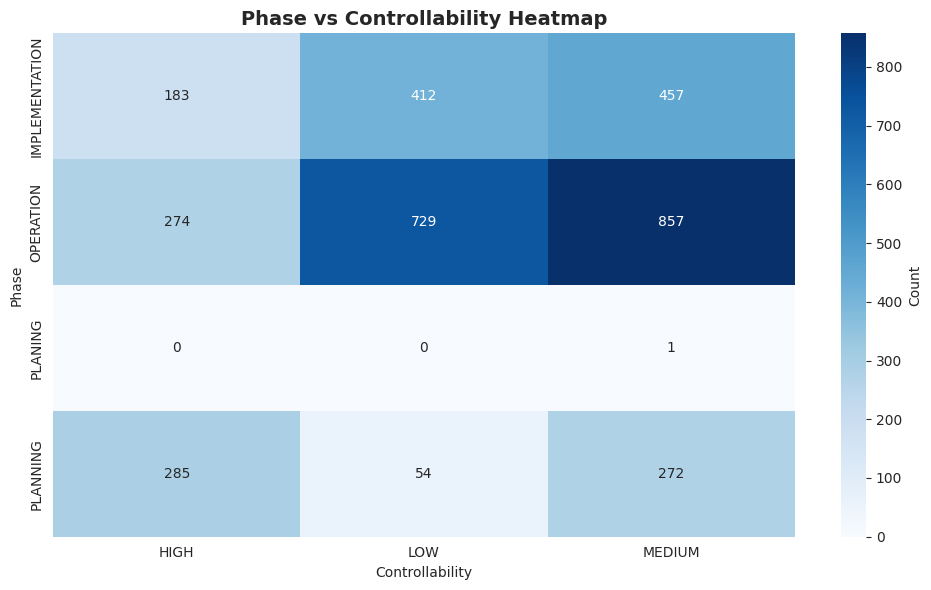

In [15]:
# Phase vs Controllability cross-tabulation
print("Phase vs Controllability Cross-tabulation:")
phase_control_ct = pd.crosstab(df['phase'], df['controllability'], margins=True)
print(phase_control_ct)
print("\n" + "="*80 + "\n")

# Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['phase'], df['controllability']), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Phase vs Controllability Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Controllability')
plt.ylabel('Phase')
plt.tight_layout()
plt.show()

Actor vs Controllability Cross-tabulation:
controllability  HIGH   LOW  MEDIUM   All
actor                                    
EXOGENOUS           0   495       3   498
JICA              258     7     116   381
MULTIPLE          126    70     344   540
PARTNER           344   575    1071  1990
VENDOR             14    48      54   116
All               742  1195    1588  3525




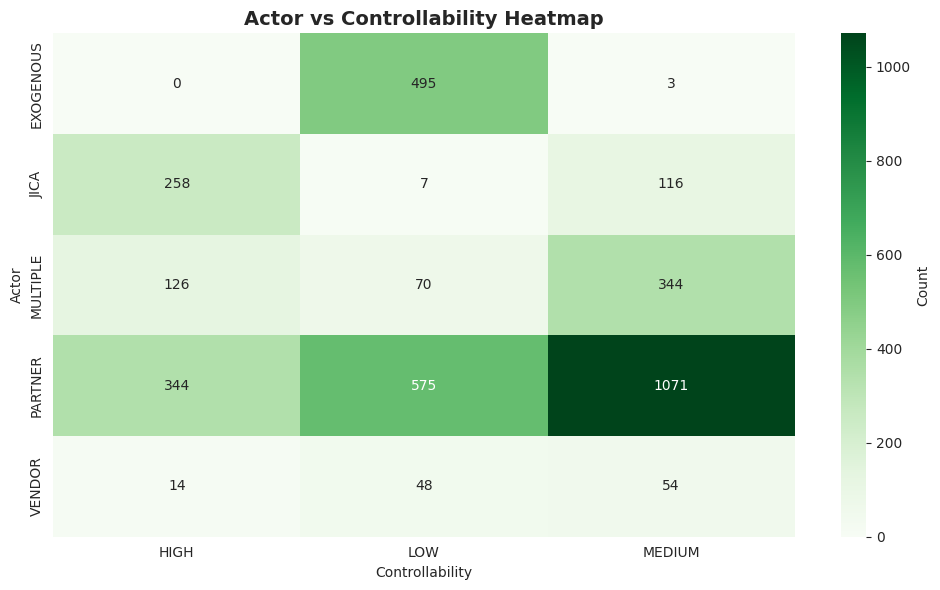

In [16]:
# Actor vs Controllability cross-tabulation
print("Actor vs Controllability Cross-tabulation:")
actor_control_ct = pd.crosstab(df['actor'], df['controllability'], margins=True)
print(actor_control_ct)
print("\n" + "="*80 + "\n")

# Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['actor'], df['controllability']), annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Actor vs Controllability Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Controllability')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

Overrun-Related by Phase:
is_overrun_related  False  True   All
phase                                
IMPLEMENTATION        368   684  1052
OPERATION            1839    21  1860
PLANING                 0     1     1
PLANNING              510   101   611
All                  2717   807  3524




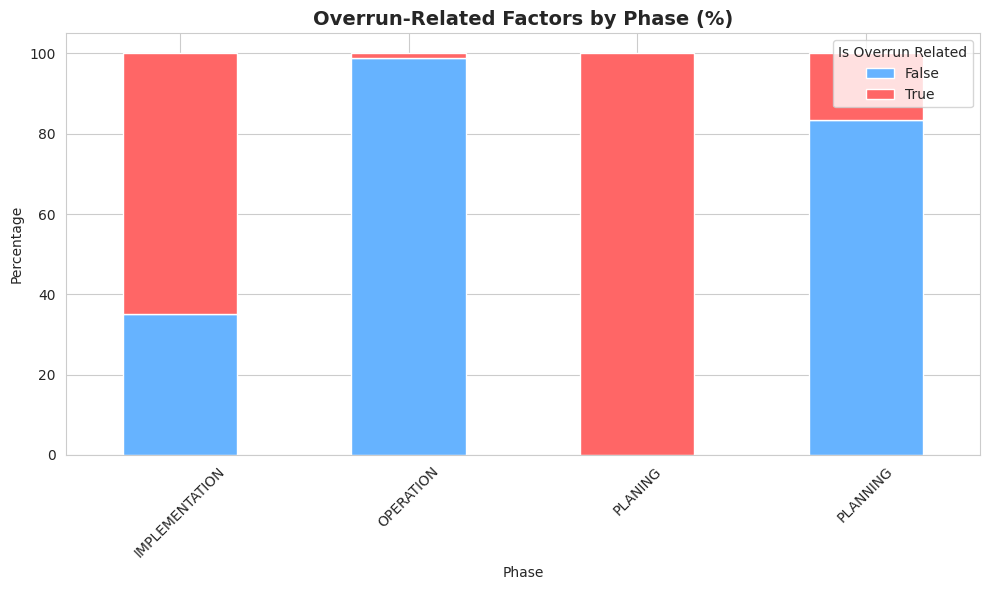

In [17]:
# Overrun-related by Phase
print("Overrun-Related by Phase:")
overrun_phase_ct = pd.crosstab(df['phase'], df['is_overrun_related'], margins=True)
print(overrun_phase_ct)
print("\n" + "="*80 + "\n")

# Visualize as stacked bar chart
overrun_phase = pd.crosstab(df['phase'], df['is_overrun_related'], normalize='index') * 100
overrun_phase.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff6666'])
plt.title('Overrun-Related Factors by Phase (%)', fontsize=14, fontweight='bold')
plt.xlabel('Phase')
plt.ylabel('Percentage')
plt.legend(title='Is Overrun Related', labels=['False', 'True'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overrun-Related by Actor:
is_overrun_related  False  True   All
actor                                
EXOGENOUS             315   183   498
JICA                  295    86   381
MULTIPLE              350   190   540
PARTNER              1715   275  1990
VENDOR                 43    73   116
All                  2718   807  3525




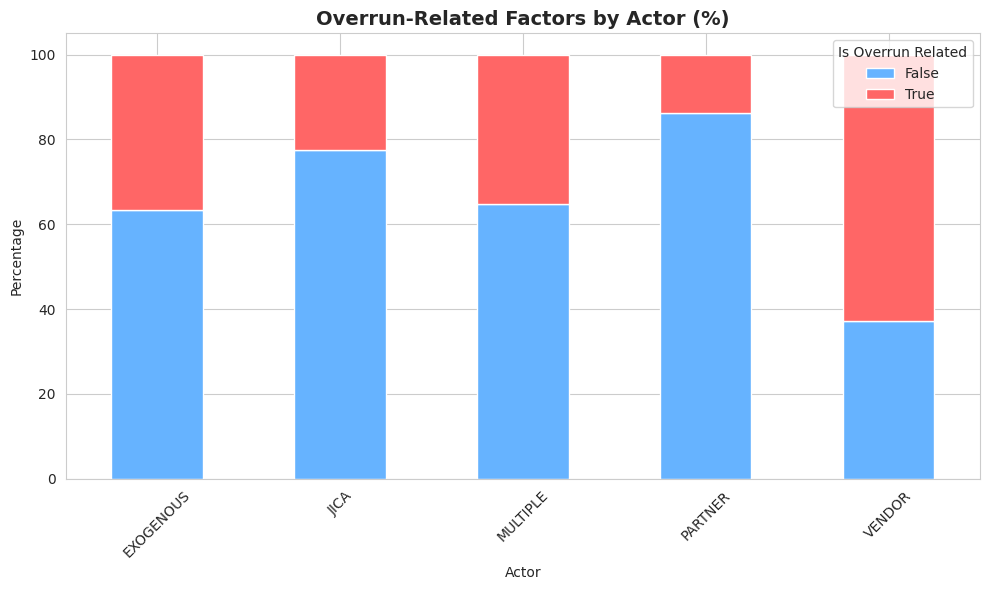

In [18]:
# Overrun-related by Actor
print("Overrun-Related by Actor:")
overrun_actor_ct = pd.crosstab(df['actor'], df['is_overrun_related'], margins=True)
print(overrun_actor_ct)
print("\n" + "="*80 + "\n")

# Visualize as stacked bar chart
overrun_actor = pd.crosstab(df['actor'], df['is_overrun_related'], normalize='index') * 100
overrun_actor.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff6666'])
plt.title('Overrun-Related Factors by Actor (%)', fontsize=14, fontweight='bold')
plt.xlabel('Actor')
plt.ylabel('Percentage')
plt.legend(title='Is Overrun Related', labels=['False', 'True'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Text Analysis - Failure Factors

In [19]:
# Most common failure factors
print("Top 20 Most Common Failure Factors:")
fail_factor_counts = df['fail_factor'].value_counts().head(20)
print(fail_factor_counts)
print("\n" + "="*80)

Top 20 Most Common Failure Factors:
fail_factor
ASDP1からASDP2への移行に伴い、主要財源であるバスケット基金が中央政府から支出されなくなった                   2
円借款附帯プロジェクトの業務期間が計画より約1年短縮されたこと                                      2
鉄鋼価格およびザンビア・クワチャの対米ドルレートの上昇                                          1
維持管理技術の未確立および維持管理支出の不足                                               1
戦争による財政危機に伴う、マスタープラン承認による財政的責任の回避                                    1
荷役効率の向上を測定するための統計データ収集体制の欠如                                          1
マスタープラン策定時の財務的フィージビリティや資金調達方法の調査・確認不足                                1
計画部および管理職における計画策定能力および管理全般の能力不足                                      1
民間業者との共同運営契約の継続性に依存する不透明な予算構造                                        1
調査の過程で判明したサービスバースF/Sや保安対策等の追加調査コンポーネントの発生                            1
当初の入札不調の発生                                                           1
一部機材の据付時期の遅延                                                         1
汎用性が低い機材や高度技術機器におけるアフターサービス体制の脆弱性とスペアパーツ入手難                          1
実施機関内部の複数部門間における機材稼働状況の情報共有体制

Failure Factor Length Statistics:
count    3519.000000
mean       36.152032
std         9.118319
min         7.000000
25%        30.000000
50%        36.000000
75%        42.000000
max        73.000000
Name: fail_factor_length, dtype: float64


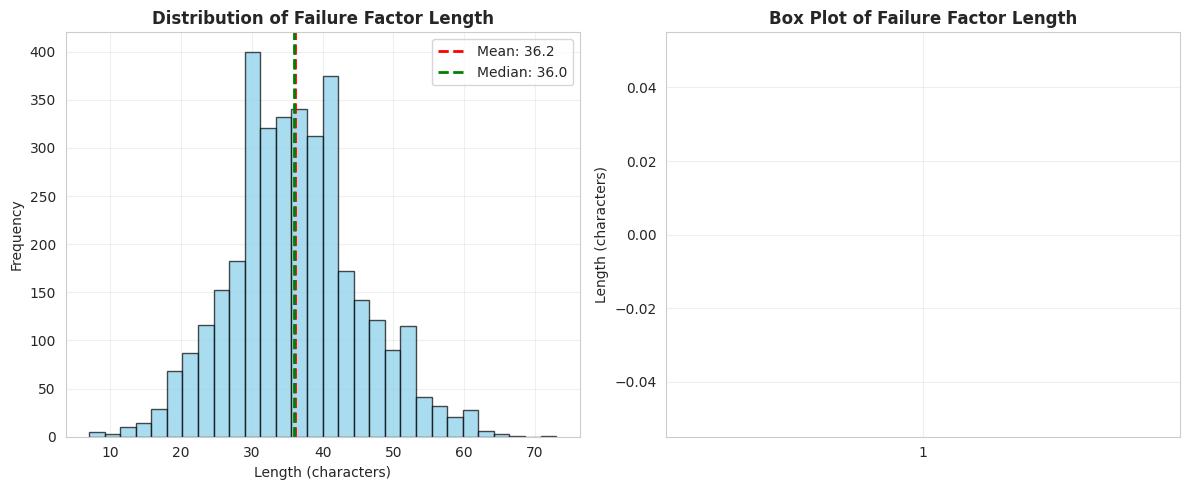

In [20]:
# Length distribution of failure factors
df['fail_factor_length'] = df['fail_factor'].str.len()
print("Failure Factor Length Statistics:")
print(df['fail_factor_length'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['fail_factor_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['fail_factor_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["fail_factor_length"].mean():.1f}')
plt.axvline(df['fail_factor_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["fail_factor_length"].median():.1f}')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Failure Factor Length', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['fail_factor_length'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', edgecolor='black'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Length (characters)')
plt.title('Box Plot of Failure Factor Length', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Text Analysis - Impacts

Impact Length Statistics:
count    3526.000000
mean       41.602666
std         7.042693
min        14.000000
25%        37.000000
50%        41.000000
75%        46.000000
max        78.000000
Name: impact_length, dtype: float64


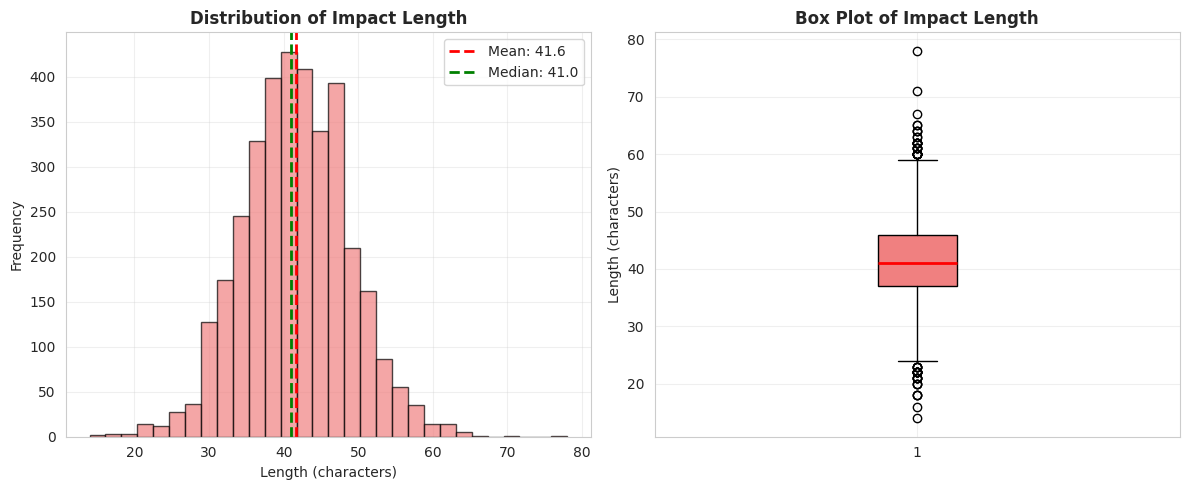

In [21]:
# Length distribution of impacts
df['impact_length'] = df['impact'].str.len()
print("Impact Length Statistics:")
print(df['impact_length'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['impact_length'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(df['impact_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["impact_length"].mean():.1f}')
plt.axvline(df['impact_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["impact_length"].median():.1f}')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Impact Length', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['impact_length'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightcoral', edgecolor='black'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Length (characters)')
plt.title('Box Plot of Impact Length', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Evidence Section Analysis

In [22]:
# Evidence section distribution
print("Top 15 Evidence Sections:")
evidence_section_counts = df['evidence_section'].value_counts().head(15)
print(evidence_section_counts)
print("\n" + "="*80)

Top 15 Evidence Sections:
evidence_section
4 持続性                 481
2 有効性・インパクト           353
3 効率性                 201
Ⅲ 提言・教訓               119
３.２.２.２ 事業期間          104
3.4.2.2 事業期間           65
プロジェクト目標及び上位目標の達成度     57
Ⅱ 評価結果                 51
2 有効性･インパクト            48
０. 要旨                  46
JICA への教訓              40
4.3 教訓                 38
Ⅲ 教訓・提言                36
Ⅱ 評価結果 4 持続性           35
1 妥当性                  33
Name: count, dtype: int64



## 8. Confidence Score Analysis by Category

In [27]:
# Confidence by Phase
print("Confidence Score Statistics by Phase:")
print(df.groupby('phase')['confidence'].describe())
print("\n" + "="*80)

Confidence Score Statistics by Phase:
                 count      mean       std   min  25%  50%   75%  max
phase                                                                
IMPLEMENTATION  1052.0  0.920371  0.062742  0.70  0.9  0.9  1.00  1.0
OPERATION       1860.0  0.904677  0.060009  0.70  0.9  0.9  0.90  1.0
PLANING            1.0  1.000000       NaN  1.00  1.0  1.0  1.00  1.0
PLANNING         611.0  0.905237  0.058998  0.75  0.9  0.9  0.95  1.0



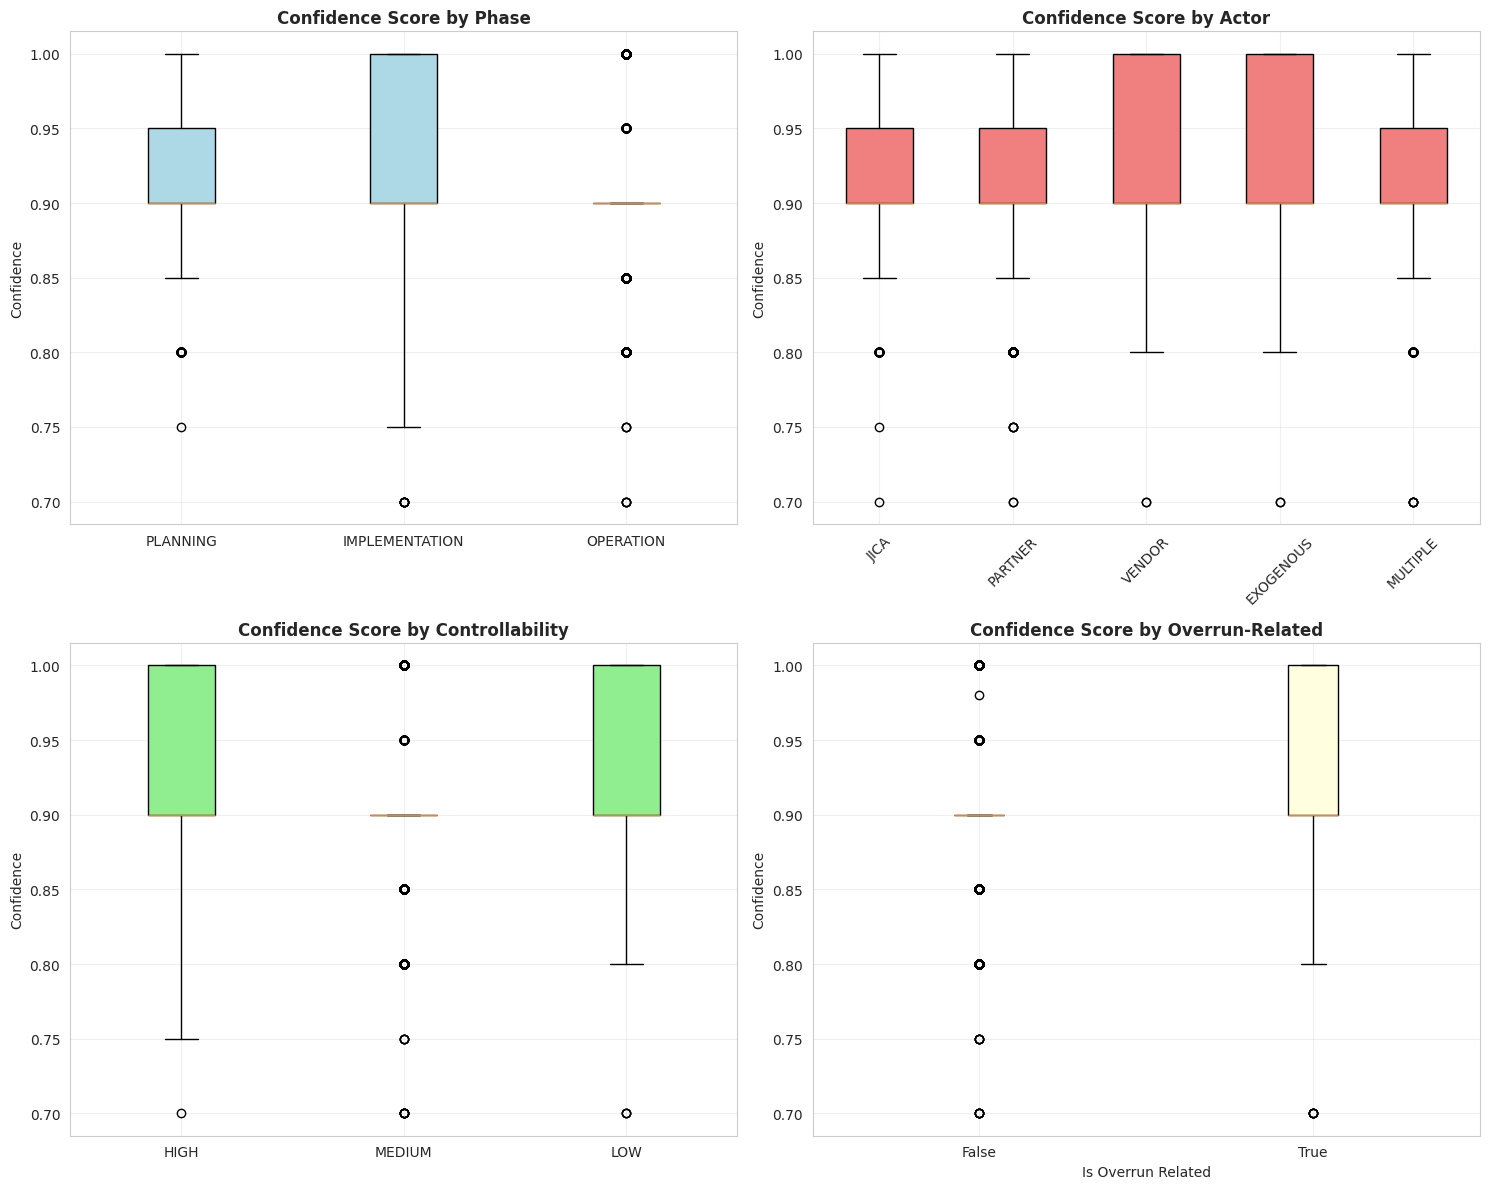

In [24]:
# Visualize confidence by categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confidence by Phase
phase_order = ['PLANNING', 'IMPLEMENTATION', 'OPERATION']
df_phase = df[df['phase'].isin(phase_order)].copy()
axes[0, 0].boxplot([df_phase[df_phase['phase']==p]['confidence'].values for p in phase_order if p in df_phase['phase'].values],
                    labels=[p for p in phase_order if p in df_phase['phase'].values],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[0, 0].set_title('Confidence Score by Phase', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Confidence')
axes[0, 0].grid(alpha=0.3)

# Confidence by Actor
actor_order = ['JICA', 'PARTNER', 'VENDOR', 'EXOGENOUS', 'MULTIPLE']
df_actor = df[df['actor'].isin(actor_order)].copy()
axes[0, 1].boxplot([df_actor[df_actor['actor']==a]['confidence'].values for a in actor_order if a in df_actor['actor'].values],
                    labels=[a for a in actor_order if a in df_actor['actor'].values],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightcoral'))
axes[0, 1].set_title('Confidence Score by Actor', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Confidence')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(alpha=0.3)

# Confidence by Controllability
control_order = ['HIGH', 'MEDIUM', 'LOW']
df_control = df[df['controllability'].isin(control_order)].copy()
axes[1, 0].boxplot([df_control[df_control['controllability']==c]['confidence'].values for c in control_order if c in df_control['controllability'].values],
                    labels=[c for c in control_order if c in df_control['controllability'].values],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'))
axes[1, 0].set_title('Confidence Score by Controllability', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Confidence')
axes[1, 0].grid(alpha=0.3)

# Confidence by Overrun-Related
overrun_groups = df.groupby('is_overrun_related')['confidence'].apply(list)
axes[1, 1].boxplot([overrun_groups[False], overrun_groups[True]],
                    labels=['False', 'True'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightyellow'))
axes[1, 1].set_title('Confidence Score by Overrun-Related', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Confidence')
axes[1, 1].set_xlabel('Is Overrun Related')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Generate summary statistics
print("="*80)
print("KEY INSIGHTS SUMMARY")
print("="*80)
print()

print("1. DATASET OVERVIEW:")
print(f"   - Total failure factors: {len(df)}")
print(f"   - Unique projects: {df['file'].nunique()}")
print(f"   - Average factors per project: {len(df)/df['file'].nunique():.2f}")
print()

print("2. PHASE DISTRIBUTION:")
for phase, count in df['phase'].value_counts().items():
    print(f"   - {phase}: {count} ({count/len(df)*100:.1f}%)")
print()

print("3. ACTOR DISTRIBUTION:")
for actor, count in df['actor'].value_counts().items():
    print(f"   - {actor}: {count} ({count/len(df)*100:.1f}%)")
print()

print("4. CONTROLLABILITY:")
for control, count in df['controllability'].value_counts().items():
    print(f"   - {control}: {count} ({count/len(df)*100:.1f}%)")
print()

print("5. OVERRUN-RELATED:")
overrun_true = (df['is_overrun_related'] == True).sum()
overrun_false = (df['is_overrun_related'] == False).sum()
print(f"   - True: {overrun_true} ({overrun_true/len(df)*100:.1f}%)")
print(f"   - False: {overrun_false} ({overrun_false/len(df)*100:.1f}%)")
print()

print("6. CONFIDENCE SCORES:")
print(f"   - Mean: {df['confidence'].mean():.2f}")
print(f"   - Median: {df['confidence'].median():.2f}")
print(f"   - High confidence (≥0.8): {(df['confidence']>=0.8).sum()} ({(df['confidence']>=0.8).sum()/len(df)*100:.1f}%)")
print()

print("7. TOP 3 FAILURE FACTORS:")
for i, (factor, count) in enumerate(df['fail_factor'].value_counts().head(3).items(), 1):
    print(f"   {i}. {factor[:70]}... ({count} occurrences)")
print()

print("="*80)

KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Total failure factors: 3526
   - Unique projects: 527
   - Average factors per project: 6.69

2. PHASE DISTRIBUTION:
   - OPERATION: 1860 (52.8%)
   - IMPLEMENTATION: 1052 (29.8%)
   - PLANNING: 611 (17.3%)
   - PLANING: 1 (0.0%)

3. ACTOR DISTRIBUTION:
   - PARTNER: 1990 (56.4%)
   - MULTIPLE: 540 (15.3%)
   - EXOGENOUS: 498 (14.1%)
   - JICA: 381 (10.8%)
   - VENDOR: 116 (3.3%)

4. CONTROLLABILITY:
   - MEDIUM: 1588 (45.0%)
   - LOW: 1195 (33.9%)
   - HIGH: 742 (21.0%)

5. OVERRUN-RELATED:
   - True: 807 (22.9%)
   - False: 2718 (77.1%)

6. CONFIDENCE SCORES:
   - Mean: 0.91
   - Median: 0.90
   - High confidence (≥0.8): 3509 (99.5%)

7. TOP 3 FAILURE FACTORS:
   1. ASDP1からASDP2への移行に伴い、主要財源であるバスケット基金が中央政府から支出されなくなった... (2 occurrences)
   2. 円借款附帯プロジェクトの業務期間が計画より約1年短縮されたこと... (2 occurrences)
   3. 鉄鋼価格およびザンビア・クワチャの対米ドルレートの上昇... (1 occurrences)



In [26]:
df[['title','fail_factor','impact','confidence']].sample(30)

,title,fail_factor,impact,confidence
615,デブブ州地方都市給水計画,人員充当予算の限定と州政府からの財政支援不足によるスタッフの絶対数不足,増加する人口や接続需要に対し運営維持管理体制が整わず、給水接続工事や研修が満足に行えない,0.90
2798,サヘル地域における貯水池の有効活用と自律的コミュニティ開発プロジェクト,水利組合の管理委員会が、貯水池の補修や維持管理に必要な資金を十分に確保・充当できなかったこと,発生した水漏れに対する適切な補修が行われず、施設の機能不全が進行する結果となった,1.00
1266,バーブーダ島零細漁業施設整備計画,漁民が無料の自然海岸での操業を好み、有料の近代的施設を利用するメリットを感じなかったこと,水揚げ桟橋やスリップウェイの利用率が計画の2〜3割程度にとどまり、漁業の効率化への貢献が限定...,0.90
3321,ビエンチャンバス公社運営能力改善プロジェクト／ビエンチャンバス公社能力改善プロジェクトフェーズ 2,バスサービスの改善のみで乗客数が増えるという、外部環境（自家用車普及等）を考慮しない不適切な...,サービスは改善したものの利用者の行動変容に結びつかず、利用者数増加やモーダルシフトの目標が未...,0.90
1294,予防接種体制整備計画,高額な交換部品（太陽光蓄電池）の更新費用に対する予算確保の見通しの欠如,"287台の太陽光蓄電池の耐用年数超過に伴う、約2,100万円の更新費用確保が困難で持続性に懸...",1.00
2493,統合的沿岸生態系保全・適応管理プロジェクト,供与された設備・機材の運営維持管理費が個別に配分されず、予算不足により機材の較正が行われなかった。,供与された多くの機材の較正が行われず、結果として機材が活用されていない。,0.90
1451,住民参加型基礎教育改善プロジェクト,住民からの学校建設要望を文書化し集計・管理する体制の欠如,要望数に関するデータの入手ができず、プロジェクト目標の達成度（指標2）の検証が困難となった,0.85
328,セントビンセント オウイア水産センター整備計画,既存の流通慣習（地曳網漁民による直接販売）に対する理解不足と、その変更を前提とした設計,桟橋利用料の徴収も行えず、センターが地域経済の集積地として機能せず持続性が低下,0.90
1883,ヴィアナ職業訓練センター整備計画／ヴィアナ職業訓練センター機材整備計画,供与機材のラベルやマニュアルが現地語（ポルトガル語）ではなく、日本語や英語で作成されていた,機材の操作が容易ではなく、講師の技術習得や適切な維持管理の妨げとなっている,0.90
1836,南部地方給水計画,上下水道公社からの送水要請に基づく、ジブチ政府内での対象地選定の変更判断,当初予定されていた対象地（アンボクタ）がプロジェクトから外され、アウトプットが減少した,0.90
